In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pathlib
import mne
import mne_bids
import mne
%matplotlib inline
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs)
import os


In [2]:
def get_raw_EEG(sid):
    raw_path = 'sub-0%.2d_task-memory_eeg.set'%(sid)
    raw = mne.io.read_raw_eeglab(raw_path, preload = True)
    return raw

In [3]:
def get_event(filename):
    events, event_id = mne.events_from_annotations(filename)
    return events, event_id

In [4]:
sid = 32
folder_subj = '/s'+str(sid)
folder_raws='/raws'
folder_epochs = '/epochs'

In [5]:
folder00='/Users/jouanchung/Documents/Brainhack/WM'


In [6]:
# create folder
import os
def create_folders(sid,folder00):
    folder_subj = '/s'+str(sid)
    folder_raws='/raws'
    folder_epochs = '/epochs'
    if not os.path.exists(folder00+folder_subj):
        print('Creating folders'+folder_subj+'et al.')
        os.makedirs(folder00+folder_subj+folder_raws)
        os.makedirs(folder00+folder_subj+folder_epochs)
    return folder_raws,folder_epochs

folder_raws,folder_epochs = create_folders(sid,folder00)

In [7]:
# get raw EEG data
raw = get_raw_EEG(32)
raw.info

/Users/jouanchung/miniconda3/lib/python3.9/site-packages/pymatreader/utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '
/var/folders/pb/psfryrqn1dz3hg7_n8k1p2n00000gn/T/ipykernel_5999/2732879397.py:3: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = mne.io.read_raw_eeglab(raw_path, preload = True)
/var/folders/pb/psfryrqn1dz3hg7_n8k1p2n00000gn/T/ipykernel_5999/2732879397.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(raw_path, preload = True)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 63
 projs: []
 sfreq: 1000.0 Hz
>

In [ ]:
raw.plot()

In [8]:
# filter the EEG data
raw_filtered  = raw.filter(1,40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:  1.0min finished


In [9]:
# get events 
events, event_id= get_event(raw_filtered)
# onlt get the events in need 
events_dict=event_id
new_events_dict = {key: events_dict[key] for key in events_dict.keys()
       & {'6005050','6005051', '6009090','6009091','6013130','6013131'}}

Used Annotations descriptions: ['500105', '500109', '500113', '500205', '500209', '500213', '500305', '500309', '500313', '500405', '500409', '500413', '500505', '500509', '500513', '500609', '500613', '500709', '500713', '500809', '500813', '500909', '500913', '501013', '501113', '501213', '501313', '6001051', '6001090', '6001091', '6001130', '6001131', '6002051', '6002090', '6002091', '6002130', '6002131', '6003051', '6003090', '6003091', '6003130', '6003131', '6004051', '6004090', '6004091', '6004130', '6004131', '6005051', '6005090', '6005091', '6005130', '6005131', '6006090', '6006091', '6006130', '6006131', '6007090', '6007091', '6007130', '6007131', '6008090', '6008091', '6008130', '6008131', '6009090', '6009091', '6009130', '6009131', '6010130', '6011130', '6012130', '6013130', 'boundary']


In [10]:
# read epochs
tmin = -0.2
tmax = 0.5
baseline = (None, 0)

epochs = mne.Epochs(raw_filtered,
                    events=events,
                    event_id=new_events_dict,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,
                    preload=True,
                    on_missing='warn')
epochs

Not setting metadata
108 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 108 events and 701 original time points ...
0 bad epochs dropped


Number of events,108
Events,6005051: 366009090: 306009091: 66013130: 36
Time range,-0.200 – 0.500 s
Baseline,-0.200 – 0.000 s


In [ ]:
epochs.save(folder00+folder_subj+folder_epochs+folder_subj +'-epochs-epo.fif')

#epochs = mne.read_epochs(pathlib.Path('out_data') / 'epochs_epo.fif')

In [11]:
n_components = 20
method = 'infomax'
max_iter = 100  # Should normally be higher, like 500 or even 1000!!
random_state = 42

ica = mne.preprocessing.ICA(n_components=n_components,
                            method=method,
                            max_iter=max_iter,
                            random_state=random_state)
ica.fit(epochs)

Fitting ICA to data using 63 channels (please be patient, this may take a while)


/var/folders/pb/psfryrqn1dz3hg7_n8k1p2n00000gn/T/ipykernel_5999/27885579.py:10: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Selecting by number: 20 components
 
Fitting ICA took 17.3s.


Method,infomax
Fit,100 iterations on epochs (75708 samples)
ICA components,20
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


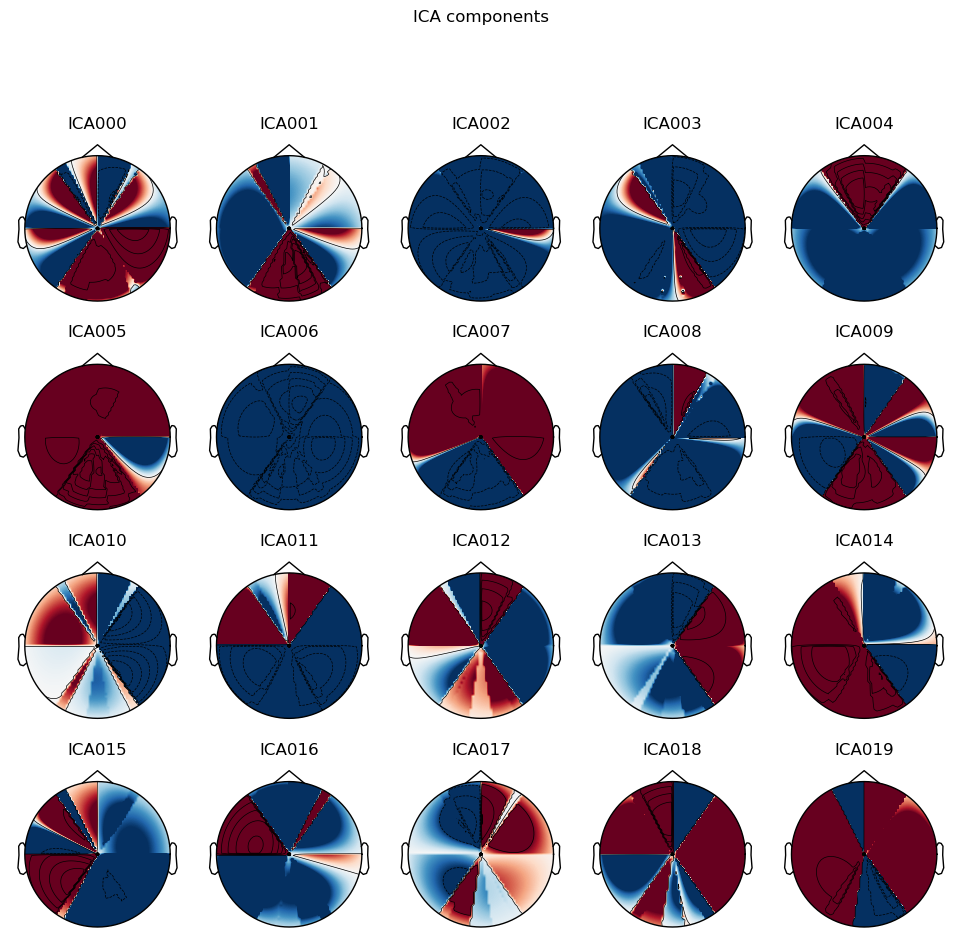

[<MNEFigure size 975x967 with 20 Axes>]

In [12]:
ica.plot_components(inst=epochs)


Not setting metadata
108 matching events found
No baseline correction applied
0 projection items activated
Using matplotlib as 2D backend.


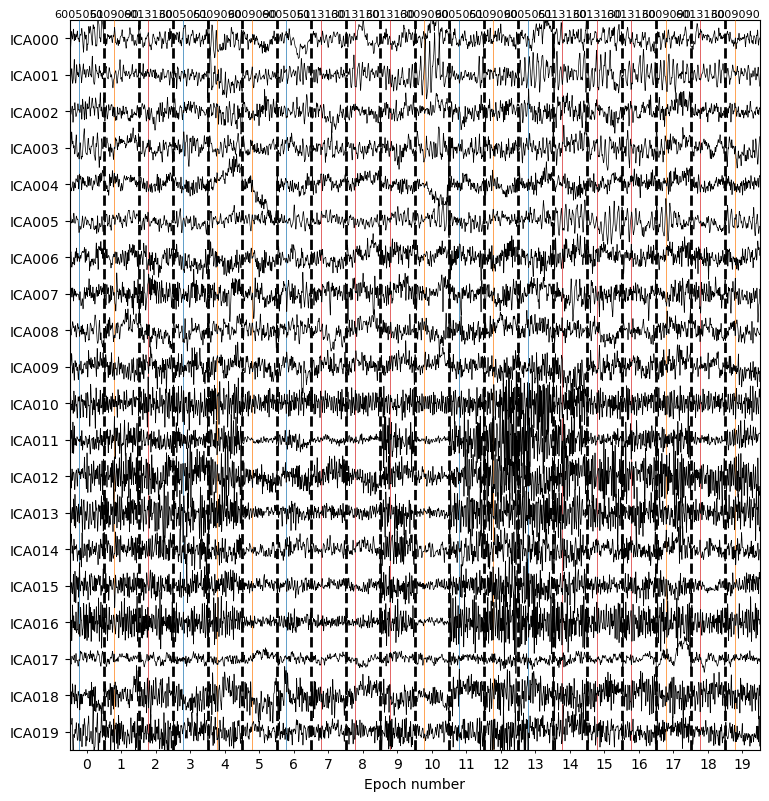

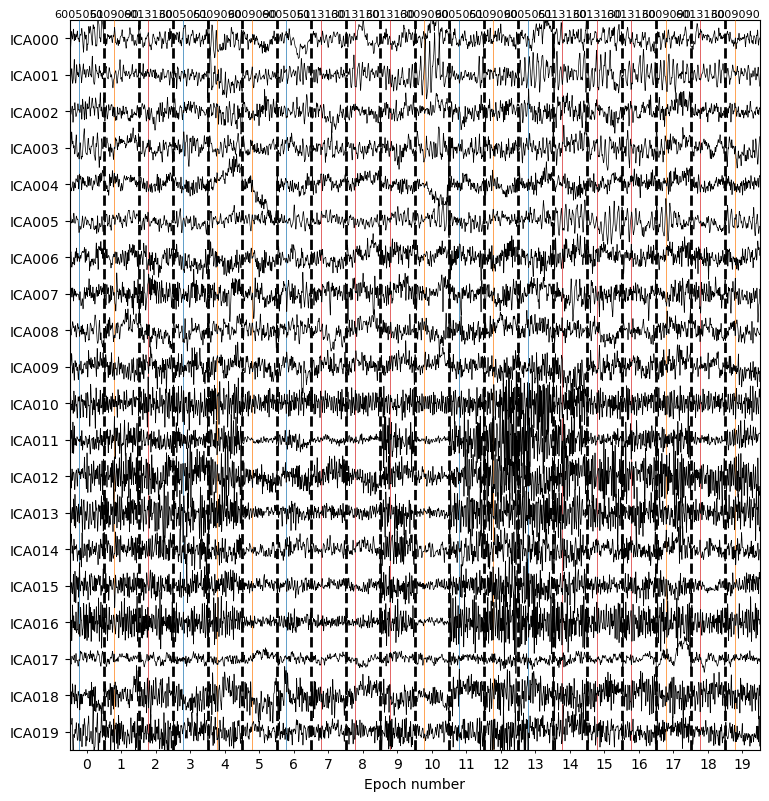

In [13]:
ica.plot_sources(epochs,show_scrollbars=False)


In [ ]:
#check ICA exlusion  and  comparison 
ica.plot_overlay(raw, exclude=[0,4,10], verbose='WARNING');

In [ ]:
# exclude specific ICA 
ica.exclude = [0,4,10] 
# ica.apply() changes the Raw object in-place, so let's make a copy first:
reconst_epochs = epochs.copy()
ica.apply(reconst_epochs)


In [ ]:
%matplotlib qt
epochs.plot();
reconst_epochs.plot();

In [ ]:
epochs.save(folder00+folder_subj+folder_epochs+folder_subj +'-reconst_epochs-epo.fif')
